Instructions: \
This code template provides you with some starting points for the Consumer Price Index (CPI) case study! It is outlined as follows. 
- First we install all of the packages that we need to use for this project. Make sure you download these packages as needed.
- Then we load in the data and make the rename the columns to make it easier to reference and use. 
- After that, we will crete a simple line graph of this data, with CPI on the y axis and year on the x axis. Because this is timeseries data, a line graph is best suited to show trends. 
- Next, this template will give you the numrical ARIMA resutls for this data. Use this to draw conlcutions and for further analysis.
- Finally, this template will create an offset dataframe that you will use to create a predictive model. 
- Now it's your turn to code! Use this template along with the ARIMA article resourse to create a predictive model of CPI for the next decade. For this model, make sure to use the future_df dataframe to create a predictive figure for the next 120 observations. There are further instuction in the TODO.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import statsmodels.api as sm
%matplotlib inline

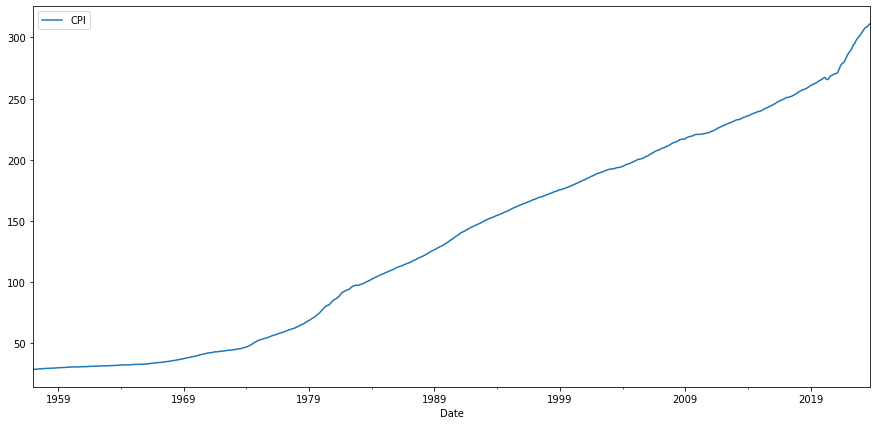

In [38]:
#Load data 
df=pd.read_csv('ConsumerPriceIndex.csv')

df.columns=["Date","CPI"]
df.describe()
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)

#Create a line graph of the time series data.
rcParams['figure.figsize'] = 15, 7
df.plot()
plt.savefig("CPI_Plot.png", dpi =300, facecolor = "white")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shreenidhichundi/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  import sys


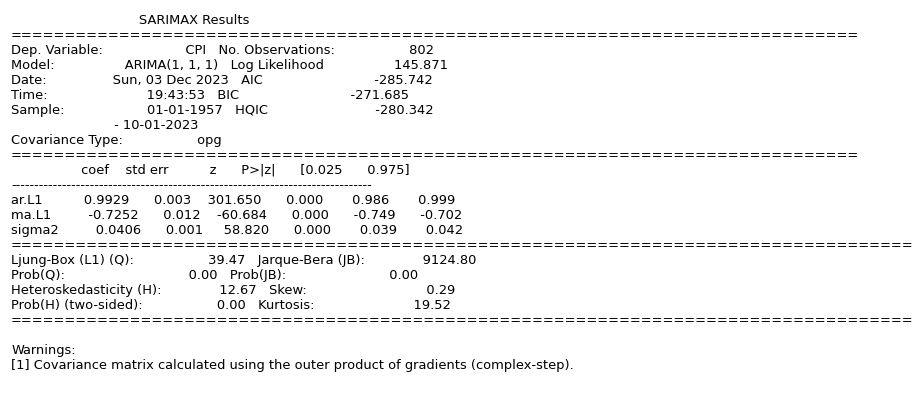

In [39]:
# ARIMA resutls for this data
model = ARIMA(df['CPI'], order=(1, 1, 1))
model_fit = model.fit()
plt.rc('figure', figsize=(7, 7))
plt.text(0.01, 0.05, str(model_fit.summary()), {'fontsize': 13})
plt.axis('off')
plt.tight_layout()
plt.savefig("ARIMA_Model.png", bbox_inches='tight', facecolor = "white")

In [40]:
#TODO: Create your predictive model here. Use the 'ARIMA-modeling' pdf to 
# guide you on how to create a model of the CPI for the next 10 years. 
# For further clarity, create a model that isolates the 10 year predcition 
# as its own graph. Use this to create a regression line and conduct 
# your analysis from there.

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,120)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()
future_df=pd.concat([df,future_datest_df])

